# Comparison of Rounce et al. 2023 projections to projections of our model options

- this notebook is not yet cleaned up -> it will be done later!

In [90]:
# figure path
fig_path = '/home/users/lschuster/Schuster_et_al_phd_paper_1_cluster/figures'
# data path -> data created from 00_data_creating scripts
data_path = '/home/users/lschuster/Schuster_et_al_phd_paper_1_cluster/01_data'

In [87]:
import xarray as xr
import matplotlib.pyplot as plt
### path to the data
fpath = '/home/www/lschuster/rounce_2023_data'

In [88]:
# get all Alpine glaciers and all SSP scenarios
# there are also RCP scenarios (but we don't want them for this analysis)
dts = [] 
for ssp in ['ssp126', 'ssp245', 'ssp370', 'ssp585']: #'ssp119',
    
    _dt = xr.open_dataset(f'{fpath}/R11_glac_mass_annual_50sets_2000_2100-{ssp}.nc')
    _dt['glacier'] = _dt.RGIId
    _dt['model'] = _dt.Climate_Model
    _dt['ssp'] = ssp
    dts.append(_dt)
dt_ssp = xr.concat(dts, dim = 'ssp')


**Only Hintereisferner:**

Text(0.5, 1.0, 'Rounce et al. (2023) - Hintereisferner: 12 GCMs')

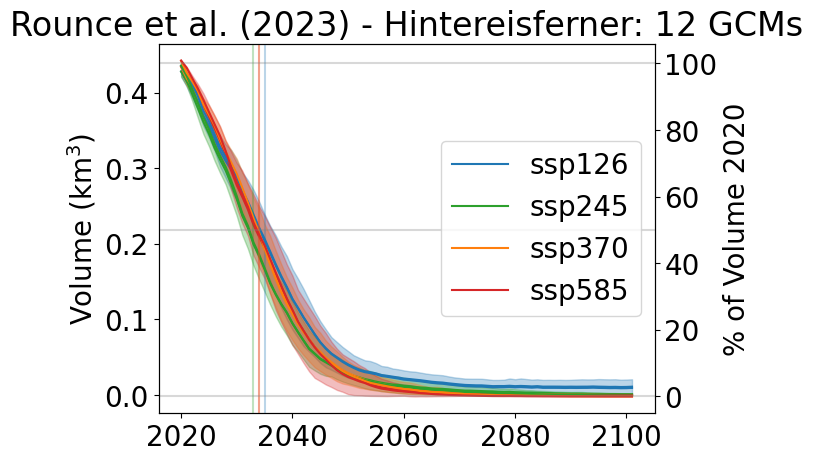

In [89]:
colors_ssp = ['#1f77b4', '#2ca02c',  '#ff7f0e', '#d62728']
rgi_id_hef = ['RGI60-11.00897']

dvol_sel = dt_ssp.sel(glacier = rgi_id_hef).glac_mass_annual.sum(dim='glacier')/900/1e9 # kg into V (km3)
dvol_sel = dvol_sel.sel(year=slice(2020,2101))
dt_vol = dvol_sel.mean(dim='model') 
dt_vol_std = dvol_sel.std(dim='model') 
dt_vol_2020 = dt_vol.sel(year=2020).mean(dim='ssp')
for j,ssp in enumerate(['ssp126', 'ssp245', 'ssp370', 'ssp585']):
    plt.plot(dt_vol.year, dt_vol.sel(ssp=ssp), color = colors_ssp[j]) #kg/m3
    plt.fill_between(dt_vol.year, 
                     dt_vol.sel(ssp=ssp)-dt_vol_std.sel(ssp=ssp),
                     dt_vol.sel(ssp=ssp)+dt_vol_std.sel(ssp=ssp),
                     color = colors_ssp[j], alpha = 0.3) #kg/m3
    

ax = plt.gca()
ax.set_ylabel(r'Volume (km$^3$)')
ax2 = ax.twinx()

for j,ssp in enumerate(['ssp126', 'ssp245', 'ssp370', 'ssp585']):
    dt_vol_rel_ssp = dt_vol.sel(ssp=ssp)*100/dt_vol_2020
    ax2.plot(dt_vol_rel_ssp.year, dt_vol_rel_ssp,
             label=ssp,
            color = colors_ssp[j]) #kg/m3
    # year where more than 50% of glacier volume is lost relative to 2020
    yr_50_perc = dt_vol_rel_ssp.where(dt_vol_rel_ssp<=50).dropna(dim='year').isel(year=0).year
    plt.axvline(yr_50_perc, color = colors_ssp[j], alpha = 0.3)
plt.axhline(0, color = 'grey', alpha = 0.3)
plt.axhline(50, color='grey', alpha = 0.3)
plt.axhline(100, color='grey', alpha = 0.3)
plt.ylabel('% of Volume 2020')
plt.legend()

plt.title(f'Rounce et al. (2023) - Hintereisferner: 12 GCMs')
#plt.savefig('rounce_2023_hef_evolution.png')

## Comparison with OGGM massbalance-sandbox

### Aletsch glacier

27.791546395362595
0.21969260278913394
36.06548
0.62119347


Text(0.5, 1.0, 'Schuster et al. (2023) - Aletschglacier : 3 common GCMs')

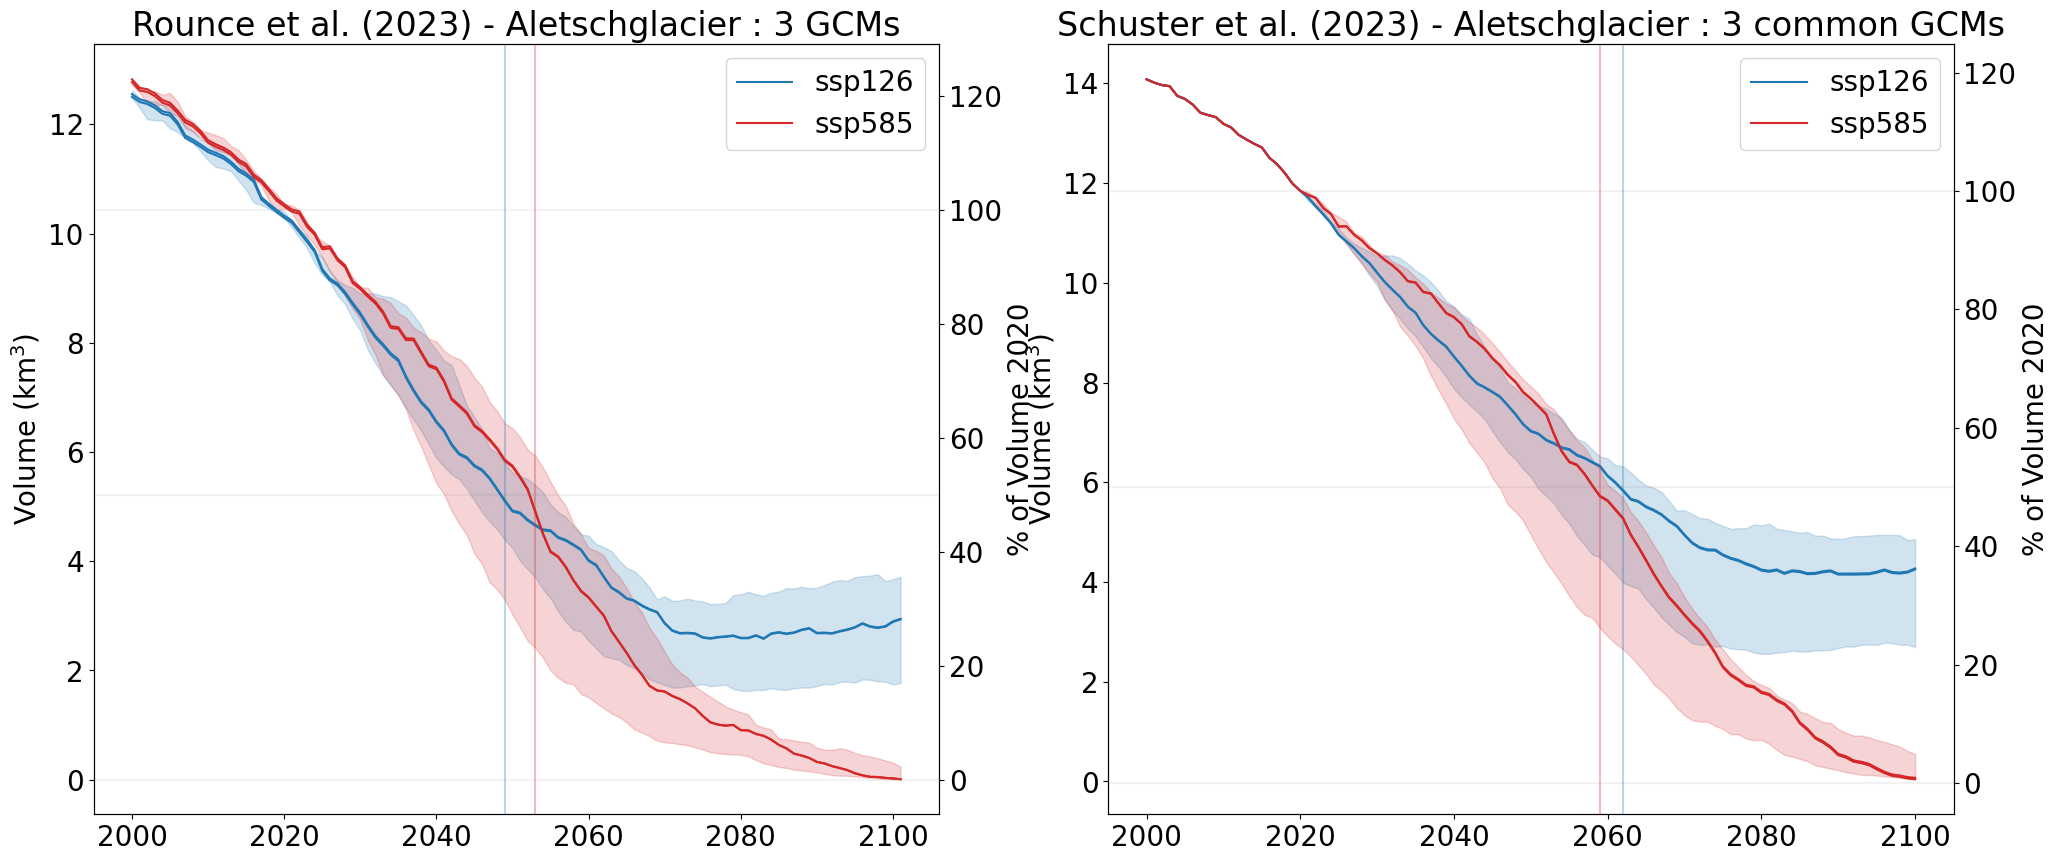

In [93]:
# Total Oetztal glacier volume evolution plot
rgi_ids = ['RGI60-11.01450']
colors_ssp = ['#1f77b4','#d62728'] # '#2ca02c',  '#ff7f0e', 

#########
plt.figure(figsize=(24,10))

plt.subplot(121)

dt_ssp_common = dt_ssp.sel(model = ['GFDL-ESM4', 'MPI-ESM1-2-HR', 'MRI-ESM2-0' ])

dvol_sel = dt_ssp_common.sel(glacier = rgi_ids).glac_mass_annual.sum(dim='glacier')/900/1e9 # kg into V (km3)

dvol_sel = dvol_sel.sel(year=slice(2000,2101))
dt_vol = dvol_sel.median(dim='model') 
dt_vol_2020 = dt_vol.sel(year=2020).sel(ssp=['ssp126', 'ssp585']).mean(dim='ssp')
for j,ssp in enumerate(['ssp126', 'ssp585']):
    plt.plot(dt_vol.year, dt_vol.sel(ssp=ssp), color = colors_ssp[j]) #kg/m3
    plt.fill_between(dt_vol.year, 
                     dvol_sel.min(dim='model').sel(ssp=ssp),
                     dvol_sel.max(dim='model').sel(ssp=ssp),
                     color = colors_ssp[j], alpha = 0.2) #kg/m3

ax = plt.gca()
ax.set_ylabel(r'Volume (km$^3$)')
ax2 = ax.twinx()

for j,ssp in enumerate(['ssp126', 'ssp585']):
    dt_vol_rel_ssp = dt_vol.sel(ssp=ssp)*100/dt_vol_2020
    ax2.plot(dt_vol_rel_ssp.year, dt_vol_rel_ssp,
             label=ssp,
            color = colors_ssp[j]) #kg/m3
    # year where more than 50% of glacier volume is lost relative to 2020
    yr_50_perc = dt_vol_rel_ssp.where(dt_vol_rel_ssp<=50).dropna(dim='year').isel(year=0).year
    plt.axvline(yr_50_perc, color = colors_ssp[j], alpha = 0.3)
    
    print(dt_vol_rel_ssp.sel(year=2100).values)

plt.axhline(0, color = 'grey', alpha = 0.1)
plt.axhline(50, color='grey', alpha = 0.1)
plt.axhline(100, color='grey', alpha = 0.1)
plt.ylabel('% of Volume 2020')
plt.legend()

#plt.ylim([-0.01,125])
plt.title(f'Rounce et al. (2023) - Aletschglacier : 3 GCMs')
#plt.savefig('rounce_2023_aletsch_glacier_evolution.png')


################################
plt.subplot(122)
dt_oggm_mbsandbox_options = xr.open_dataset(f'{data_path}/3_volume_proj_common_running_refs_w5e5_isimip3b.nc')
dt_oggm_mbsandbox_options = dt_oggm_mbsandbox_options.sel(gcm = ['gfdl-esm4_r1i1p1f1', 'mpi-esm1-2-hr_r1i1p1f1',
                                                                 'mri-esm2-0_r1i1p1f1'])


dvol_sel = dt_oggm_mbsandbox_options.sel(rgi_id = rgi_ids).volume.sum(dim='rgi_id')/1e9 # kg into V (km3)

dvol_sel = dvol_sel.median(dim=['grad_type','mb_type', 'melt_f_change', 'calib_type'])

dvol_sel = dvol_sel.sel(time=slice(2000.,2100.))
dt_vol = dvol_sel.median(dim='gcm') 
dt_vol_2020 = dt_vol.sel(time=2020.).sel(ssp=['ssp126', 'ssp585']).mean(dim='ssp')
for j,ssp in enumerate(['ssp126', 'ssp585']):
    plt.plot(dt_vol.time, dt_vol.sel(ssp=ssp), color = colors_ssp[j]) #kg/m3
    plt.fill_between(dt_vol.time, 
                     dvol_sel.min(dim='gcm').sel(ssp=ssp),
                     dvol_sel.max(dim='gcm').sel(ssp=ssp),
                     color = colors_ssp[j], alpha = 0.2) #kg/m3
ax = plt.gca()
ax.set_ylabel(r'Volume (km$^3$)')
ax2 = ax.twinx()

for j,ssp in enumerate(['ssp126', 'ssp585']):
    dt_vol_rel_ssp = dt_vol.sel(ssp=ssp)*100/dt_vol_2020
    ax2.plot(dt_vol_rel_ssp.time, dt_vol_rel_ssp,
             label=ssp,
            color = colors_ssp[j]) #kg/m3
    # year where more than 50% of glacier volume is lost relative to 2020
    yr_50_perc = dt_vol_rel_ssp.where(dt_vol_rel_ssp<=50).dropna(dim='time').isel(time=0).time
    plt.axvline(yr_50_perc, color = colors_ssp[j], alpha = 0.3)
    print(dt_vol_rel_ssp.sel(time=2100).values)

plt.axhline(0, color = 'grey', alpha = 0.1)
plt.axhline(50, color='grey', alpha = 0.1)
plt.axhline(100, color='grey', alpha = 0.1)
plt.ylabel('% of Volume 2020')
plt.legend()

#plt.ylim([-0.01,125])

plt.title(f'Schuster et al. (2023) - Aletschglacier : 3 common GCMs')
#plt.savefig('rounce_2023_aletsch_glacier_evolution.png')


In [94]:
(100-27.791546395362595)/(100-36.06548)

1.1294126178571047

- over the median of the 3 common GCMs, the relative volume loss relative to 2020 of Aletsch glacier under SSP1-2.6 from \citet{Rounce2023data} is around 13\% larger than our median option, but lies within the range of our various examined model options. 

## Create global projection dataset 

In [2]:
# get all glaciers and some SSP scenarios
# there are also RCP scenarios (but we don't want them for this analysis)
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
fpath = '/home/www/lschuster/rounce_2023_data'

dt_ssp_l = []
for r in np.arange(1,20,1):
    if r<10:
        r = f'0{r}'
    else:
        r = str(r)
    
    dts = [] 
    for ssp in ['ssp126', 'ssp585']:
        #['ssp119','ssp126', 'ssp245', 'ssp370', 'ssp585']: #'ssp119',
        _dt = xr.open_dataset(f'{fpath}/R{r}_glac_mass_annual_50sets_2000_2100-{ssp}.nc')
        _dt = _dt.set_index(glacier = 'RGIId')
        _dt = _dt.set_index(model = 'Climate_Model')
        _dt['ssp'] = ssp 
        _dt['RGI_reg'] = r 
        dts.append(_dt)
          
    dt_ssp = xr.concat(dts, dim = 'ssp')
    _dt.close()
    dt_ssp_l.append(dt_ssp)


In [3]:
dt_ssp_all = xr.concat(dt_ssp_l, dim='glacier')
dt_ssp_all = dt_ssp_all.drop('crs')
dt_ssp_all = dt_ssp_all.rename_dims({'model':'gcm', 'glacier':'rgi_id', 'year':'time'})
dt_ssp_all = dt_ssp_all[['glac_mass_annual', 'RGI_reg']]
dt_ssp_all = dt_ssp_all.set_index(gcm='model')
dt_ssp_all = dt_ssp_all.set_index(rgi_id='glacier')
dt_ssp_all = dt_ssp_all.set_index(time = 'year')
dt_ssp_all['gcm'] = [x.lower() for x in dt_ssp_all.gcm.values]


In [85]:
#dt_ssp_all['volume'] = dt_ssp_all.glac_mass_annual/ 900

In [88]:
dt_ssp_all_sum = dt_ssp_all.sum(dim='rgi_id')
dt_ssp_all_sum_rel = 100*dt_ssp_all_sum/dt_ssp_all_sum.sel(time=2020)

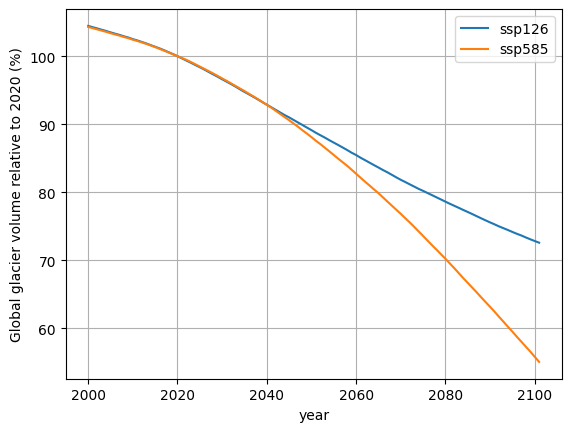

In [90]:
for j,ssp in enumerate(['ssp126',  'ssp585']): #'ssp245', 'ssp370',
    plt.plot(dt_ssp_all_sum_rel.time, 
             dt_ssp_all_sum_rel.sel(ssp=ssp).mean(dim='gcm').glac_mass_annual,
            #color=colors_ssp[j*2],
            label=ssp)
plt.legend()
plt.ylabel('Global glacier volume relative to 2020 (%)')
plt.xlabel('year')
plt.grid()


In [ ]:
dt_ssp_all

In [93]:
dt_ssp_all_sum_r11 = dt_ssp_all.sel(rgi_id=dt_ssp_all.rgi_id.where(dt_ssp_all.RGI_reg == '11').isel(ssp=0).dropna(dim='rgi_id').values).sum(dim='rgi_id')

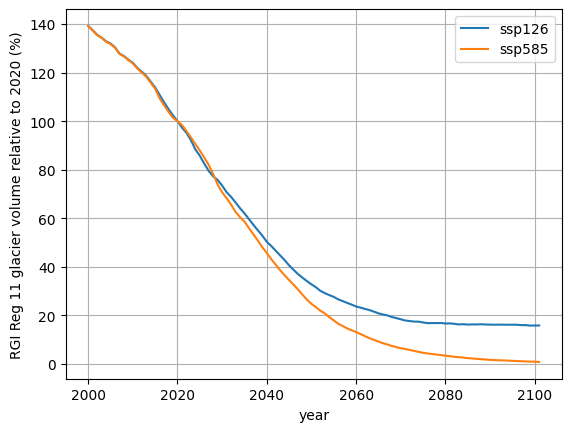

In [95]:
dt_ssp_all_sum_r11_rel = 100*dt_ssp_all_sum_r11/dt_ssp_all_sum_r11.sel(time=2020)

for j,ssp in enumerate(['ssp126',  'ssp585']): #'ssp245', 'ssp370',
    plt.plot(dt_ssp_all_sum_r11_rel.time, 
             dt_ssp_all_sum_r11_rel.sel(ssp=ssp).mean(dim='gcm').glac_mass_annual,
            #color=colors_ssp[j*2],
            label=ssp)
plt.legend()
plt.ylabel('RGI Reg 11 glacier volume relative to 2020 (%)')
plt.xlabel('year')
plt.grid()


### select common projected ref glaciers from Schuster et al., 2023:


best would be to create a common dataset with dimension glacier_model ->
- need to have the same dimension names for that ... 
    - maybe do that at the beginning of the notebook
        - rename year
        - rename model
        - rename glacier 

In [4]:
dt_oggm_options = xr.open_dataset('/home/users/lschuster/Schuster_et_al_phd_paper_1_cluster/all_refs_W5E5_all_gcms.nc')
rgi_id_ref = list(dt_oggm_options.rgi_id.values)
dt_oggm_options['time'] = dt_oggm_options.time.astype(int)

In [5]:
common_rgis = list(set(rgi_id_ref).intersection(dt_ssp_all.rgi_id.values))

In [6]:
common_gcms = list(set([x[:-len('_r1i1p1f1')] for x in dt_oggm_options.gcm.values]).intersection(dt_ssp_all.gcm.values))

In [7]:
#dt_oggm_options['gcm_s'].set_index('gcm')

In [8]:
dt_oggm_options = dt_oggm_options.sel(gcm = [x+'_r1i1p1f1' for x in common_gcms])
#dt_oggm_options = dt_oggm_options.set_index(gcm = 'gcm_s')
dt_oggm_options = dt_oggm_options.sel(rgi_id = common_rgis).volume
dt_oggm_options.coords['gcm'] = common_gcms
dt_ssp_all_comm = dt_ssp_all.sel(rgi_id = common_rgis).sel(gcm = common_gcms).glac_mass_annual/900
dt_ssp_all_comm = dt_ssp_all_comm.sel(time = dt_oggm_options.time)
dt_ssp_all_comm_rel = 100*dt_ssp_all_comm / dt_ssp_all_comm.sel(time=2020).sel(ssp=['ssp126', 'ssp585'])

In [9]:
grad_type = 'cte'
mb_type='mb_monthly'
calib_type = 'calib_geod_opt_winter_mb_approx_std'
melt_f_change = 'False'

In [10]:
dt_opt_sel = dt_oggm_options.sel(grad_type=grad_type).sel(mb_type=mb_type).sel(calib_type=calib_type)
dt_opt_sel = dt_opt_sel.sel(melt_f_change = melt_f_change)

In [11]:
vol_ratio = (dt_ssp_all_comm/dt_ssp_all_comm.sel(time=2020)) / (dt_oggm_options/dt_oggm_options.sel(time=2020))

In [12]:
vol_ratio_sel = vol_ratio.sel(time=2100).sel(ssp = 'ssp126')
vol_ratio_sel = vol_ratio_sel.where(vol_ratio_sel!=np.infty).dropna(dim='rgi_id')
vol_ratio_sel = vol_ratio_sel.where(vol_ratio_sel>0).dropna(dim='rgi_id')

In [13]:
pd_vol_ratio_sel = vol_ratio_sel.to_dataframe(name='vol_ratio').reset_index()

In [14]:
import seaborn as sns

In [15]:
pd_vol_ratio_sel.columns

Index(['gcm', 'rgi_id', 'grad_type', 'mb_type', 'calib_type', 'melt_f_change',
       'lon', 'lat', 'ssp', 'time', 'hydro_month', 'calendar_month',
       'vol_ratio'],
      dtype='object')

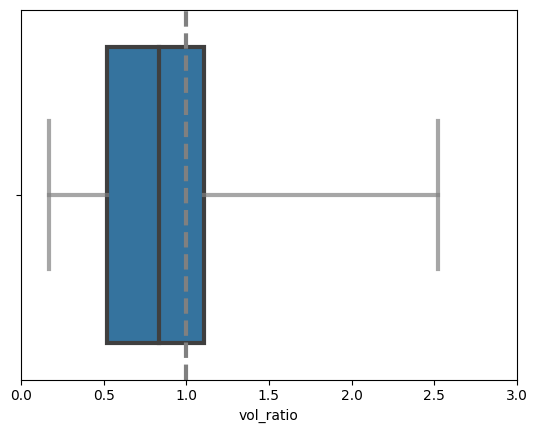

In [16]:
sns.boxplot(x= 'vol_ratio', data = pd_vol_ratio_sel,
            #y='melt_f_change',
            fliersize=0, whis=[5,95],
                        #col = 'time',
                        linewidth=3, 
                        saturation=0.7, #ax=ax,
                       capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7})
plt.xlim([0,3])
plt.axvline(1,ls='--', color='grey', lw=3)

In [17]:
pd_vol_ratio_sel.calib_type.unique()

array(['calib_geod_opt_winter_mb_approx_std',
       'calib_geod_opt_winter_mb_temp_b_0', 'calib_geod_opt_std_temp_b_0',
       'calib_only_geod_temp_b_0_pf_cte_via_std',
       'calib_only_geod_temp_b_0_pf_fit_via_winter_mb'], dtype=object)

NameError: name 'xlim0' is not defined

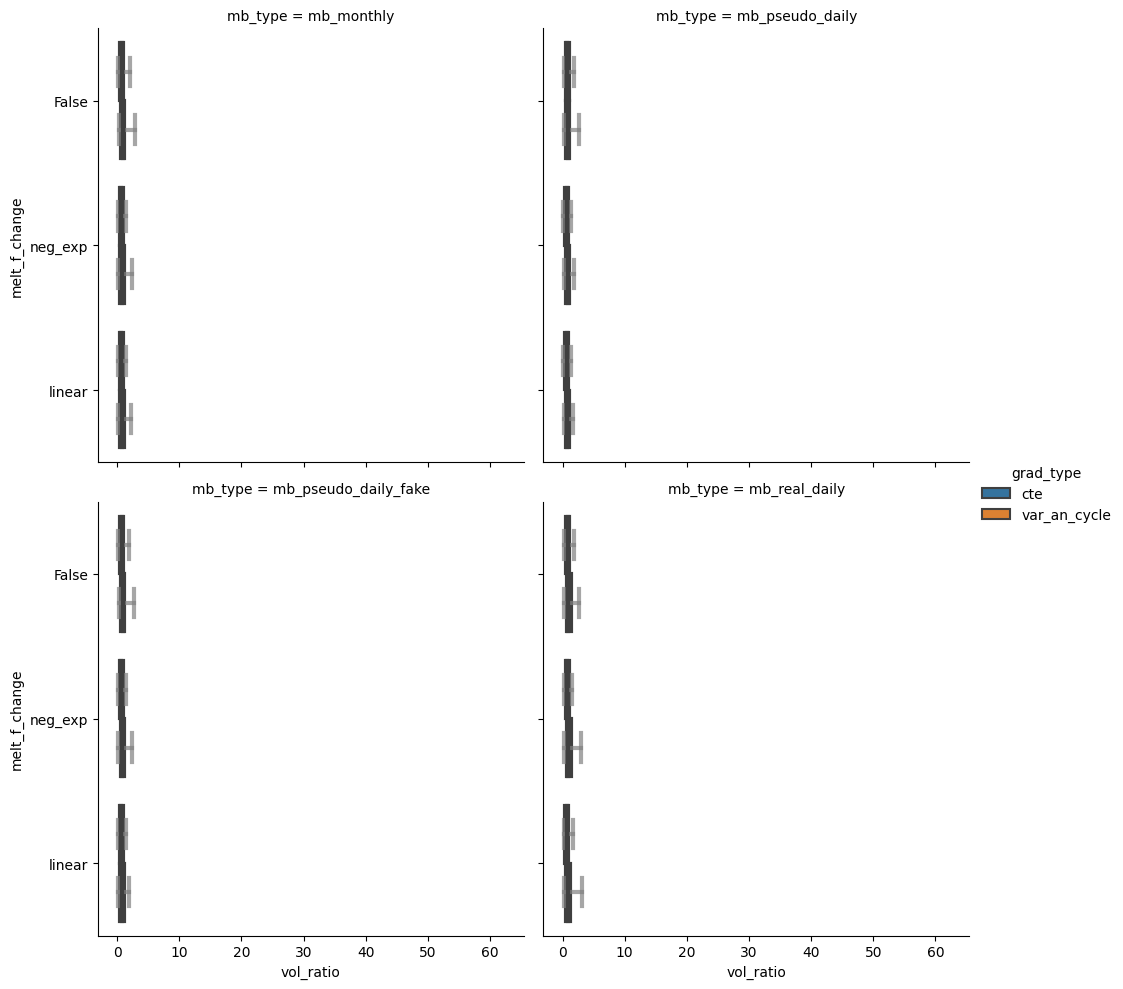

In [18]:
fig = sns.catplot(x= 'vol_ratio',
                  data = pd_vol_ratio_sel.loc[pd_vol_ratio_sel.calib_type=='calib_only_geod_temp_b_0_pf_fit_via_winter_mb'],
            y='melt_f_change', hue='grad_type', col='mb_type',
            kind='box',
                  col_wrap=2,
            fliersize=0, whis=[5,95],
                        #col = 'time',
                        linewidth=3, 
                        saturation=0.7, #ax=ax,
                       capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7})
plt.xlim([xlim0,xlim0])

xlim0 = 0.3
xlim1 = 3.3
#plt.axvline(1,ls='--', color='grey', lw=3)
from matplotlib.ticker import ScalarFormatter, NullFormatter

for j in np.arange(0,4,1):
    ax = fig.axes[j]
    ax.axvline(1,ls='--', color='grey', lw=3)
    ax.set_xscale("log")
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.set_xlim([xlim0,xlim0])
    ax.set_xticklabels([])
    ax.set_xticks([0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0],
                  labels=[0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0])

In [ ]:
fig = sns.catplot(x= 'vol_ratio', data = pd_vol_ratio_sel,
            y='melt_f_change', hue='grad_type', col='mb_type',
            kind='box',
                  col_wrap=2,
            fliersize=0, whis=[5,95],
                        #col = 'time',
                        linewidth=3, 
                        saturation=0.7, #ax=ax,
                       capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7})
plt.xlim([xlim0,xlim0])

xlim0 = 0.3
xlim1 = 3.3
#plt.axvline(1,ls='--', color='grey', lw=3)
from matplotlib.ticker import ScalarFormatter, NullFormatter

for j in np.arange(0,4,1):
    ax = fig.axes[j]
    ax.axvline(1,ls='--', color='grey', lw=3)
    ax.set_xscale("log")
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.set_xlim([xlim0,xlim0])
    ax.set_xticklabels([])
    ax.set_xticks([0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0],
                  labels=[0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0])

In [33]:
pd_vol_ratio_sel.loc[pd_vol_ratio_sel.rgi_id == 'RGI60-11.01450']['vol_ratio'].median()

0.8076480601905036

In [294]:
pd_vol_ratio_sel.dropna().groupby(by='grad_type').median()

,lon,lat,time,hydro_month,calendar_month,vol_ratio
grad_type,,,,,,
cte,8.01919,58.651,2100.0,1.0,1.0,0.774175
var_an_cycle,8.01919,58.651,2100.0,1.0,1.0,0.903877


In [26]:
pd_ratio_sel = pd_vol_ratio_sel.loc[pd_vol_ratio_sel.grad_type=='var_an_cycle']
pd_ratio_sel.groupby(by='calib_type').median()

,lon,lat,time,hydro_month,calendar_month,vol_ratio
calib_type,,,,,,
calib_geod_opt_std_temp_b_0,8.01919,58.651,2100.0,1.0,1.0,0.959250
calib_geod_opt_winter_mb_approx_std,8.01919,58.651,2100.0,1.0,1.0,0.927881
calib_geod_opt_winter_mb_temp_b_0,8.01919,58.651,2100.0,1.0,1.0,0.884678
calib_only_geod_temp_b_0_pf_cte_via_std,8.01919,58.651,2100.0,1.0,1.0,0.884445
calib_only_geod_temp_b_0_pf_fit_via_winter_mb,8.01919,58.651,2100.0,1.0,1.0,0.848387


In [25]:
pd_ratio_sel = pd_vol_ratio_sel.loc[pd_vol_ratio_sel.grad_type=='var_an_cycle']
pd_ratio_sel = pd_ratio_sel.loc[pd_ratio_sel.melt_f_change == 'neg_exp']
pd_ratio_sel = pd_ratio_sel.loc[pd_ratio_sel.mb_type == 'mb_pseudo_daily_fake']
pd_ratio_sel.dropna().groupby(by='calib_type').median()

,lon,lat,time,hydro_month,calendar_month,vol_ratio
calib_type,,,,,,
calib_geod_opt_std_temp_b_0,8.01919,58.651,2100.0,1.0,1.0,0.978786
calib_geod_opt_winter_mb_approx_std,8.01919,58.651,2100.0,1.0,1.0,0.924869
calib_geod_opt_winter_mb_temp_b_0,8.01919,58.651,2100.0,1.0,1.0,0.895021
calib_only_geod_temp_b_0_pf_cte_via_std,8.01919,58.651,2100.0,1.0,1.0,0.911921
calib_only_geod_temp_b_0_pf_fit_via_winter_mb,8.01919,58.651,2100.0,1.0,1.0,0.853683


- for a MB model option that is most similar to Rounce et al., 2023, the projection of Rounce are between 15 and 2 % (depending on chosen calibration option) smaller compared to our projections 

In [288]:
pd_ratio_c5 = pd_vol_ratio_sel.loc[pd_vol_ratio_sel.calib_type=='calib_only_geod_temp_b_0_pf_fit_via_winter_mb']
pd_ratio_c5.dropna().groupby(by='grad_type').median()

,lon,lat,time,hydro_month,calendar_month,vol_ratio
grad_type,,,,,,
cte,8.01919,58.651,2100.0,1.0,1.0,0.714932
var_an_cycle,8.01919,58.651,2100.0,1.0,1.0,0.848387


In [289]:
pd_ratio_c5.dropna().groupby(by='melt_f_change').median()

,lon,lat,time,hydro_month,calendar_month,vol_ratio
melt_f_change,,,,,,
False,8.01919,58.651,2100.0,1.0,1.0,0.844932
linear,8.01919,58.651,2100.0,1.0,1.0,0.732123
neg_exp,8.01919,58.651,2100.0,1.0,1.0,0.775856


In [290]:
pd_ratio_c5.dropna().groupby(by='mb_type').median()

,lon,lat,time,hydro_month,calendar_month,vol_ratio
mb_type,,,,,,
mb_monthly,8.01919,58.651,2100.0,1.0,1.0,0.776782
mb_pseudo_daily,8.01919,58.651,2100.0,1.0,1.0,0.752267
mb_pseudo_daily_fake,8.01919,58.651,2100.0,1.0,1.0,0.777668
mb_real_daily,8.01919,58.651,2100.0,1.0,1.0,0.812167


In [293]:
pd_vol_ratio_sel.median()['vol_ratio']

/tmp/ipykernel_385211/2953835285.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd_vol_ratio_sel.median()['vol_ratio']


0.8379460186218222

In [291]:
pd_vol_ratio_sel.groupby(by='calib_type').median()

,lon,lat,time,hydro_month,calendar_month,vol_ratio
calib_type,,,,,,
calib_geod_opt_std_temp_b_0,8.01919,58.651,2100.0,1.0,1.0,0.892194
calib_geod_opt_winter_mb_approx_std,8.01919,58.651,2100.0,1.0,1.0,0.860640
calib_geod_opt_winter_mb_temp_b_0,8.01919,58.651,2100.0,1.0,1.0,0.826762
calib_only_geod_temp_b_0_pf_cte_via_std,8.01919,58.651,2100.0,1.0,1.0,0.822905
calib_only_geod_temp_b_0_pf_fit_via_winter_mb,8.01919,58.651,2100.0,1.0,1.0,0.781377


In [ ]:
                ax.set_xscale("log")
                from matplotlib.ticker import ScalarFormatter, NullFormatter
                ax.xaxis.set_major_formatter(ScalarFormatter())
                ax.xaxis.set_minor_formatter(NullFormatter())
                ax.set_xlim([xlim0,xlim1])
                ax.set_xticklabels([])
                # ERROR
                #  ax.set_xticklabels([0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0], labels=[0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0])
                ax.set_xticks(ticks=[0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0],
                              labels=[0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0])
                ax.grid() #axis='y')

In [70]:
ax.get_xticks()

array([0.25, 0.33, 0.5 , 0.67, 1.  , 1.5 , 2.  , 3.  , 4.  ])

Text(0.5, 1.0, 'Volume projection differences in 2100 under SSP1-2.6\n for 41 glaciers x 3 GCMs x 45 other model options')

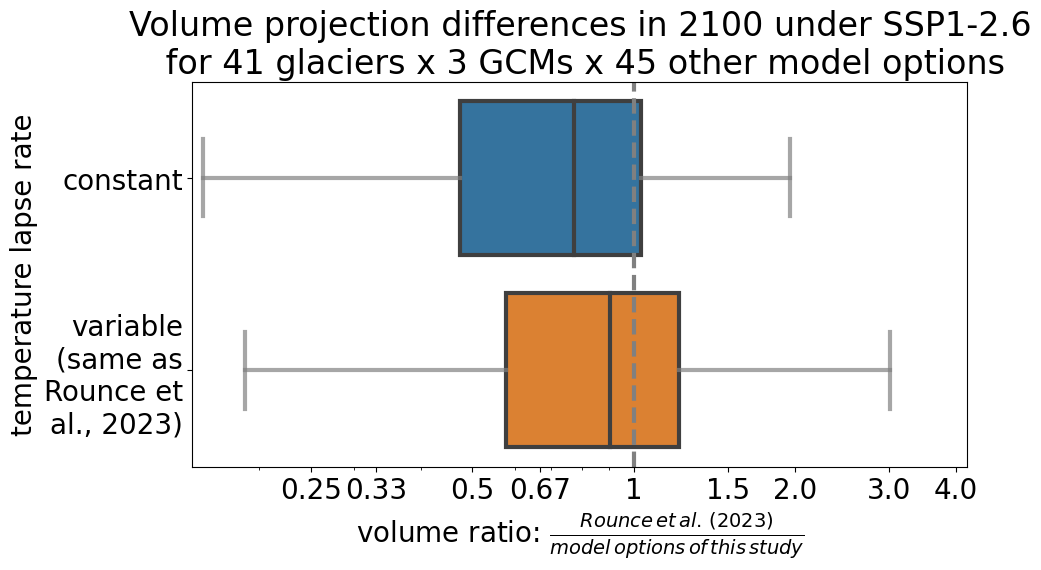

In [84]:
plt.rc('font', size=20)

plt.figure(figsize=(10,5))
sns.boxplot(x= 'vol_ratio', data = pd_vol_ratio_sel,
            y='grad_type',
            fliersize=0, whis=[5,95],
                        #col = 'time',
                        linewidth=3, 
                        saturation=0.7, #ax=ax,
                       capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7})
ax = plt.gca()
ax.axvline(1,ls='--', color='grey', lw=3)

from matplotlib.ticker import ScalarFormatter, NullFormatter

ax.set_xscale("log")
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
#ax.set_xlim([xlim0,xlim0])
ax.set_xlim([0.15,4.2])

ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xticks([0.25, 0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0,4.0],
              labels=[0.25, 0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0,4.0])
ax.set_ylabel('temperature lapse rate')
ax.set_yticklabels(['constant', 'variable\n(same as\nRounce et\nal., 2023)'])
ax.set_xlabel(r'volume ratio: $\frac{Rounce\,et\,al.\,(2023)}{model\,options\,of\,our\,study}$')
ax.set_title('Volume projection differences in 2100 under SSP1-2.6\n for 41 glaciers x 3 GCMs x 45 other model options')

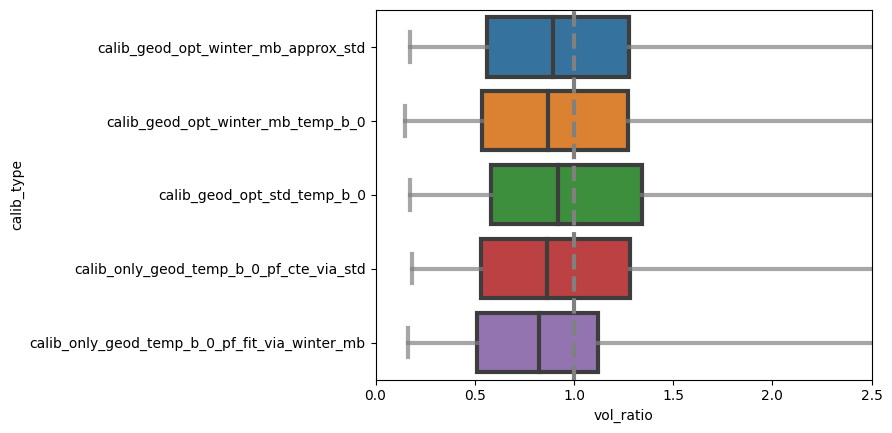

In [246]:
sns.boxplot(x= 'vol_ratio', data = pd_vol_ratio_sel,
            y='calib_type',
            fliersize=0, whis=[5,95],
                        #col = 'time',
                        linewidth=3, 
                        saturation=0.7, #ax=ax,
                       capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7})
plt.xlim([0,2.5])
plt.axvline(1,ls='--', color='grey', lw=3)

In [250]:
list(dt_ssp_all_comm.model.values).str.lower() 

AttributeError: 'list' object has no attribute 'str'

In [247]:
dt_oggm_mbsandbox_options

<xarray.Dataset>
Dimensions:         (time: 101, rgi_id: 85, gcm: 3, melt_f_change: 3,
                     calib_type: 5, ssp: 2, mb_type: 4, grad_type: 2)
Coordinates:
  * time            (time) float64 2e+03 2.001e+03 ... 2.099e+03 2.1e+03
  * rgi_id          (rgi_id) object 'RGI60-11.02679' ... 'RGI60-02.02631'
  * gcm             (gcm) object 'gfdl-esm4_r1i1p1f1' ... 'mri-esm2-0_r1i1p1f1'
  * melt_f_change   (melt_f_change) object 'False' 'neg_exp' 'linear'
    hydro_year      (time) int64 2000 2001 2002 2003 ... 2097 2098 2099 2100
    hydro_month     (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    calendar_year   (time) int64 2000 2001 2002 2003 ... 2097 2098 2099 2100
    calendar_month  (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
  * calib_type      (calib_type) object 'calib_geod_opt_winter_mb_approx_std'...
  * ssp             (ssp) object 'ssp126' 'ssp585'
  * mb_type         (mb_type) object 'mb_monthly' ... 'mb_real_daily'
  * grad_type       (grad_type) object 'cte' 'var_an_cycle'
Data variables:
    volume          (grad_type, mb_type, ssp, calib_type, melt_f_change, gcm, time, rgi_id) float32 ...

In [267]:
dt_oggm_mbsandbox_options

<xarray.Dataset>
Dimensions:         (time: 101, rgi_id: 85, gcm: 3, melt_f_change: 3,
                     calib_type: 5, ssp: 2, mb_type: 4, grad_type: 2)
Coordinates:
  * time            (time) float64 2e+03 2.001e+03 ... 2.099e+03 2.1e+03
  * rgi_id          (rgi_id) object 'RGI60-11.02679' ... 'RGI60-02.02631'
  * gcm             (gcm) object 'gfdl-esm4_r1i1p1f1' ... 'mri-esm2-0_r1i1p1f1'
  * melt_f_change   (melt_f_change) object 'False' 'neg_exp' 'linear'
    hydro_year      (time) int64 2000 2001 2002 2003 ... 2097 2098 2099 2100
    hydro_month     (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    calendar_year   (time) int64 2000 2001 2002 2003 ... 2097 2098 2099 2100
    calendar_month  (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
  * calib_type      (calib_type) object 'calib_geod_opt_winter_mb_approx_std'...
  * ssp             (ssp) object 'ssp126' 'ssp585'
  * mb_type         (mb_type) object 'mb_monthly' ... 'mb_real_daily'
  * grad_type       (grad_type) object 'cte' 'var_an_cycle'
Data variables:
    volume          (grad_type, mb_type, ssp, calib_type, melt_f_change, gcm, time, rgi_id) float32 ...

In [266]:
rgi_id_ref = dt_oggm_mbsandbox_options.rgi_id.values

In [204]:
rgi_id_ref

array(['RGI60-11.02679', 'RGI60-01.09162', 'RGI60-11.01450',
       'RGI60-02.00296', 'RGI60-11.03756', 'RGI60-11.02773',
       'RGI60-11.00603', 'RGI60-13.45335', 'RGI60-08.01779',
       'RGI60-10.01737', 'RGI60-08.01657', 'RGI60-11.03135',
       'RGI60-10.01732', 'RGI60-06.00238', 'RGI60-11.00251',
       'RGI60-08.00188', 'RGI60-11.02072', 'RGI60-08.02384',
       'RGI60-11.00619', 'RGI60-01.00570', 'RGI60-11.00843',
       'RGI60-13.45334', 'RGI60-10.01708', 'RGI60-11.02704',
       'RGI60-02.18077', 'RGI60-08.00287', 'RGI60-11.00804',
       'RGI60-12.01132', 'RGI60-08.01598', 'RGI60-01.04591',
       'RGI60-02.17612', 'RGI60-11.02249', 'RGI60-07.00240',
       'RGI60-01.01390', 'RGI60-05.20030', 'RGI60-17.02128',
       'RGI60-13.08624', 'RGI60-08.00987', 'RGI60-11.00300',
       'RGI60-02.18778', 'RGI60-06.00236', 'RGI60-08.02650',
       'RGI60-02.00377', 'RGI60-02.17369', 'RGI60-18.01130',
       'RGI60-13.05504', 'RGI60-11.03209', 'RGI60-08.01258',
       'RGI60-08.02017',

In [ ]:
rgi_ids = ['RGI60-11.01450']
colors_ssp = ['#1f77b4','#d62728'] # '#2ca02c',  '#ff7f0e', 

dt_ssp_common = dt_ssp.sel(model = ['GFDL-ESM4', 'MPI-ESM1-2-HR', 'MRI-ESM2-0' ])

dvol_sel = dt_ssp_common.sel(glacier = rgi_ids).glac_mass_annual.sum(dim='glacier')/900/1e9 # kg into V (km3)

dvol_sel = dvol_sel.sel(year=slice(2000,2101))
dt_vol = dvol_sel.median(dim='model') 
dt_vol_2020 = dt_vol.sel(year=2020).sel(ssp=['ssp126', 'ssp585']).mean(dim='ssp')
for j,ssp in enumerate(['ssp126', 'ssp585']):
    plt.plot(dt_vol.year, dt_vol.sel(ssp=ssp), color = colors_ssp[j]) #kg/m3
    plt.fill_between(dt_vol.year, 
                     dvol_sel.min(dim='model').sel(ssp=ssp),
                     dvol_sel.max(dim='model').sel(ssp=ssp),
                     color = colors_ssp[j], alpha = 0.2) #kg/m3
    
ax = plt.gca()
ax.set_ylabel(r'Volume (km$^3$)')
ax2 = ax.twinx()

for j,ssp in enumerate(['ssp126', 'ssp585']):
    dt_vol_rel_ssp = dt_vol.sel(ssp=ssp)*100/dt_vol_2020
    ax2.plot(dt_vol_rel_ssp.year, dt_vol_rel_ssp,
             label=ssp,
            color = colors_ssp[j]) #kg/m3
    # year where more than 50% of glacier volume is lost relative to 2020
    yr_50_perc = dt_vol_rel_ssp.where(dt_vol_rel_ssp<=50).dropna(dim='year').isel(year=0).year
    plt.axvline(yr_50_perc, color = colors_ssp[j], alpha = 0.3)
plt.axhline(0, color = 'grey', alpha = 0.1)
plt.axhline(50, color='grey', alpha = 0.1)
plt.axhline(100, color='grey', alpha = 0.1)
plt.ylabel('% of Volume 2020')
plt.legend()


plt.title(f'Rounce et al. (2023) - Aletschglacier : 3 GCMs')
#plt.savefig('rounce_2023_aletsch_glacier_evolution.png')

Text(0.5, 1.0, 'Schuster et al. (2023) - Aletschglacier : 3 GCMs')

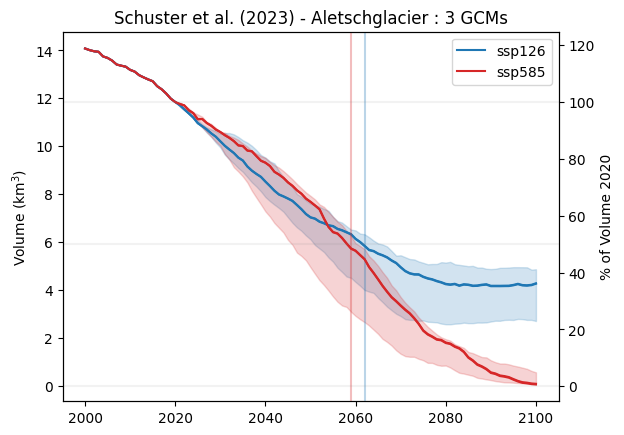

In [157]:
dt_oggm_mbsandbox_options = xr.open_dataset('/home/users/lschuster/Schuster_et_al_phd_paper_1_cluster/all_refs_W5E5_all_gcms.nc')
dt_oggm_mbsandbox_options = dt_oggm_mbsandbox_options.sel(gcm = ['gfdl-esm4_r1i1p1f1', 'mpi-esm1-2-hr_r1i1p1f1', 'mri-esm2-0_r1i1p1f1'])



# Total Oetztal glacier volume evolution plot
rgi_ids = ['RGI60-11.01450']
colors_ssp = ['#1f77b4','#d62728'] # '#2ca02c',  '#ff7f0e', 

dvol_sel = dt_oggm_mbsandbox_options.sel(rgi_id = rgi_ids).volume.sum(dim='rgi_id')/1e9 # kg into V (km3)

dvol_sel = dvol_sel.median(dim=['grad_type','mb_type', 'melt_f_change', 'calib_type'])

dvol_sel = dvol_sel.sel(time=slice(2000.,2100.))
dt_vol = dvol_sel.median(dim='gcm') 
dt_vol_2020 = dt_vol.sel(time=2020.).sel(ssp=['ssp126', 'ssp585']).mean(dim='ssp')
for j,ssp in enumerate(['ssp126', 'ssp585']):
    plt.plot(dt_vol.time, dt_vol.sel(ssp=ssp), color = colors_ssp[j]) #kg/m3
    plt.fill_between(dt_vol.time, 
                     dvol_sel.min(dim='gcm').sel(ssp=ssp),
                     dvol_sel.max(dim='gcm').sel(ssp=ssp),
                     color = colors_ssp[j], alpha = 0.2) #kg/m3
    
ax = plt.gca()
ax.set_ylabel(r'Volume (km$^3$)')
ax2 = ax.twinx()

for j,ssp in enumerate(['ssp126', 'ssp585']):
    dt_vol_rel_ssp = dt_vol.sel(ssp=ssp)*100/dt_vol_2020
    ax2.plot(dt_vol_rel_ssp.time, dt_vol_rel_ssp,
             label=ssp,
            color = colors_ssp[j]) #kg/m3
    # year where more than 50% of glacier volume is lost relative to 2020
    yr_50_perc = dt_vol_rel_ssp.where(dt_vol_rel_ssp<=50).dropna(dim='time').isel(time=0).time
    plt.axvline(yr_50_perc, color = colors_ssp[j], alpha = 0.3)
plt.axhline(0, color = 'grey', alpha = 0.1)
plt.axhline(50, color='grey', alpha = 0.1)
plt.axhline(100, color='grey', alpha = 0.1)
plt.ylabel('% of Volume 2020')
plt.legend()

plt.title(f'Schuster et al. (2023) - Aletschglacier : 3 common GCMs')
#plt.savefig('rounce_2023_aletsch_glacier_evolution.png')

Text(0.5, 1.0, 'Aletschglacier : 3 common GCMs')

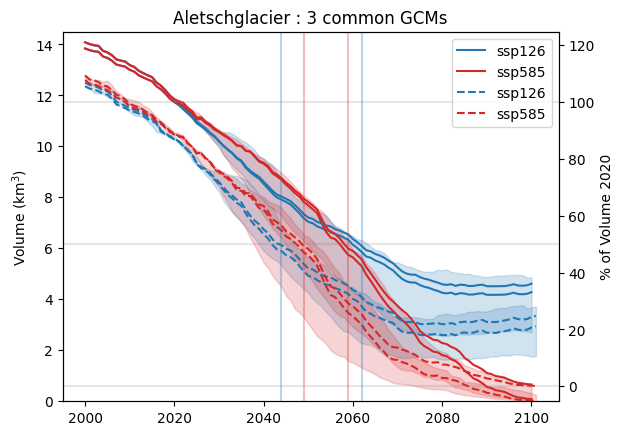

In [175]:
colors_ssp = ['#1f77b4','#d62728'] # '#2ca02c',  '#ff7f0e', 


###############
dt_oggm_mbsandbox_options = xr.open_dataset('/home/users/lschuster/Schuster_et_al_phd_paper_1_cluster/all_refs_W5E5_all_gcms.nc')
dt_oggm_mbsandbox_options = dt_oggm_mbsandbox_options.sel(gcm = ['gfdl-esm4_r1i1p1f1', 'mpi-esm1-2-hr_r1i1p1f1', 'mri-esm2-0_r1i1p1f1'])

# Total Oetztal glacier volume evolution plot
rgi_ids = ['RGI60-11.01450']
colors_ssp = ['#1f77b4','#d62728'] # '#2ca02c',  '#ff7f0e', 

dvol_sel = dt_oggm_mbsandbox_options.sel(rgi_id = rgi_ids).volume.sum(dim='rgi_id')/1e9 # kg into V (km3)

dvol_sel = dvol_sel.median(dim=['grad_type','mb_type', 'melt_f_change', 'calib_type'])

dvol_sel = dvol_sel.sel(time=slice(2000.,2100.))
dt_vol = dvol_sel.median(dim='gcm') 
dt_vol_2020 = dt_vol.sel(time=2020.).sel(ssp=['ssp126', 'ssp585']).mean(dim='ssp')
for j,ssp in enumerate(['ssp126', 'ssp585']):
    plt.plot(dt_vol.time, dt_vol.sel(ssp=ssp), color = colors_ssp[j]) #kg/m3
    plt.fill_between(dt_vol.time, 
                     dvol_sel.min(dim='gcm').sel(ssp=ssp),
                     dvol_sel.max(dim='gcm').sel(ssp=ssp),
                     color = colors_ssp[j], alpha = 0.2) #kg/m3

ax = plt.gca()
ax.set_ylabel(r'Volume (km$^3$)')
ax2 = ax.twinx()

for j,ssp in enumerate(['ssp126', 'ssp585']):
    dt_vol_rel_ssp = dt_vol.sel(ssp=ssp)*100/dt_vol_2020
    ax2.plot(dt_vol_rel_ssp.time, dt_vol_rel_ssp,
             label=ssp,
            color = colors_ssp[j]) #kg/m3
    # year where more than 50% of glacier volume is lost relative to 2020
    yr_50_perc = dt_vol_rel_ssp.where(dt_vol_rel_ssp<=50).dropna(dim='time').isel(time=0).time
    plt.axvline(yr_50_perc, color = colors_ssp[j], alpha = 0.3)
plt.axhline(0, color = 'grey', alpha = 0.1)
plt.axhline(50, color='grey', alpha = 0.1)
plt.axhline(100, color='grey', alpha = 0.1)
plt.ylabel('% of Volume 2020')
plt.legend()
ax.set_ylim([-0.01,14.5])

ylim0 = ax.get_ylim()
ylim = ax2.get_ylim()
###


dt_ssp_common = dt_ssp.sel(model = ['GFDL-ESM4', 'MPI-ESM1-2-HR', 'MRI-ESM2-0' ])
dvol_sel = dt_ssp_common.sel(glacier = rgi_ids).glac_mass_annual.sum(dim='glacier')/900/1e9 # kg into V (km3)
dvol_sel = dvol_sel.sel(year=slice(2000,2101))
dt_vol = dvol_sel.median(dim='model') 
#dt_vol_2020_rounce = dt_vol_rounce.sel(year=2020).sel(ssp=['ssp126', 'ssp585']).mean(dim='ssp')
for j,ssp in enumerate(['ssp126', 'ssp585']):
    ax.plot(dt_vol.year, dt_vol.sel(ssp=ssp), color = colors_ssp[j], ls = '--') #kg/m3
    ax.fill_between(dt_vol.year, 
                     dvol_sel.min(dim='model').sel(ssp=ssp),
                     dvol_sel.max(dim='model').sel(ssp=ssp),
                     color = colors_ssp[j], alpha = 0.2) #kg/m3


for j,ssp in enumerate(['ssp126', 'ssp585']):
    dt_vol_rel_ssp = dt_vol.sel(ssp=ssp)*100/dt_vol_2020
    ax2.plot(dt_vol_rel_ssp.year, dt_vol_rel_ssp, ls = '--',
             label=ssp,
            color = colors_ssp[j]) #kg/m3
    # year where more than 50% of glacier volume is lost relative to 2020
    yr_50_perc = dt_vol_rel_ssp.where(dt_vol_rel_ssp<=50).dropna(dim='year').isel(year=0).year
    plt.axvline(yr_50_perc, color = colors_ssp[j], alpha = 0.3)
plt.axhline(0, color = 'grey', alpha = 0.1)
plt.axhline(50, color='grey', alpha = 0.1)
plt.axhline(100, color='grey', alpha = 0.1)
plt.ylabel('% of Volume 2020')
plt.legend()


ax.set_ylim(ylim0)

ax2.set_ylim(ylim)



#plt.savefig('rounce_2023_aletsch_glacier_evolution.png')


plt.title(f'Aletschglacier : 3 common GCMs')
#plt.savefig('rounce_2023_aletsch_glacier_evolution.png')